/Users/josh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


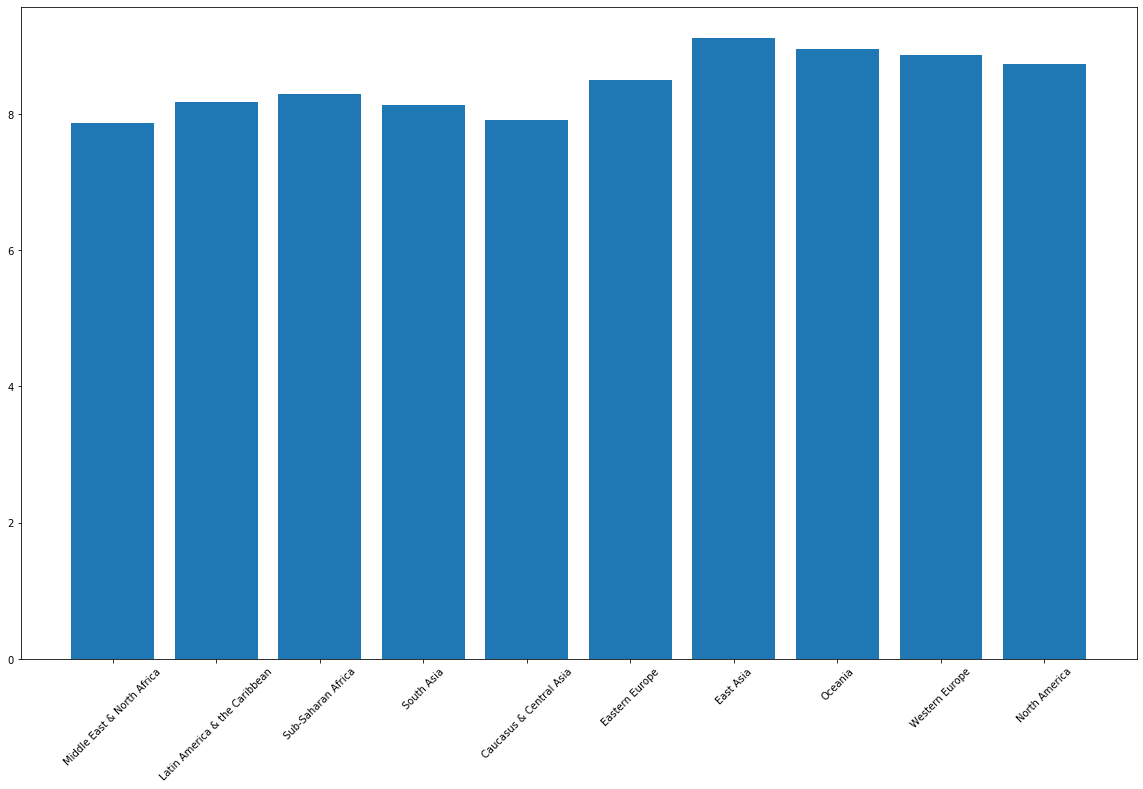

In [146]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math


df = pd.read_csv("hfi_cc_2019.csv") 
# def text2tokens(text):
#     text = text.replace("ooo","/")#
    
# df["hf_score"] = df.hf_score.apply(text2tokens)
df_clean = df[~df.hf_score.str.contains("-")]

df_clean["hf_score"]= df_clean["hf_score"].astype(float)
df_clean
# df = df.groupby(["region"]).agg({'hf_score': 'mean'})

df_clean

df2 = pd.read_csv("sentiment_analysis_byRegion.csv") 
df2 = df2.groupby(["region"]).agg({'score': 'mean'})
# print(df2)
df2


df_clean = df_clean.sort_values(by = "hf_score")
plt.figure(figsize=(20,12))

plt.bar(df_clean["region"], df_clean["hf_score"], alpha =1)
plt.xticks(rotation=45)
plt.show()

In [147]:
new_df = pd.read_csv("sentiment_analysis_byRegion.csv")
df_clean.head(20)
df_clean.to_csv("df_clean.csv")

<Figure size 720x432 with 0 Axes>

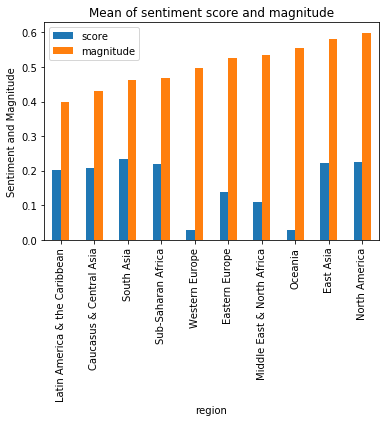

In [148]:
aggregation_functions_mean = {"region":"first","score":"mean","magnitude":"mean"}
by_region_mean = new_df.groupby(by="region").aggregate(aggregation_functions_mean)
by_region_mean = by_region_mean.sort_values(by="magnitude")

plt.figure(figsize=(10,6))
plt.tight_layout()
by_region_mean.plot.bar(x = "region",y=["score","magnitude"])
plt.title("Mean of sentiment score and magnitude")
plt.ylabel("Sentiment and Magnitude")


plt.show()

<Figure size 720x432 with 0 Axes>

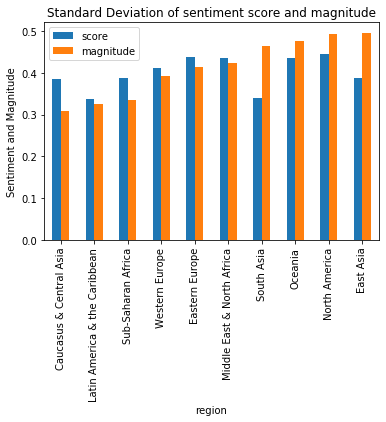

In [149]:
aggregation_functions_std = {"region":"first","score":"std","magnitude":"std"}
by_region_std = new_df.groupby(by="region").aggregate(aggregation_functions_std)
by_region_std = by_region_std.sort_values(by="magnitude")


plt.figure(figsize=(10,6))
plt.tight_layout()
by_region_std.plot.bar(x = "region",y=["score","magnitude"])
plt.title("Standard Deviation of sentiment score and magnitude")
plt.ylabel("Sentiment and Magnitude")
plt.show()

/Users/josh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Figure size 1440x1440 with 0 Axes>

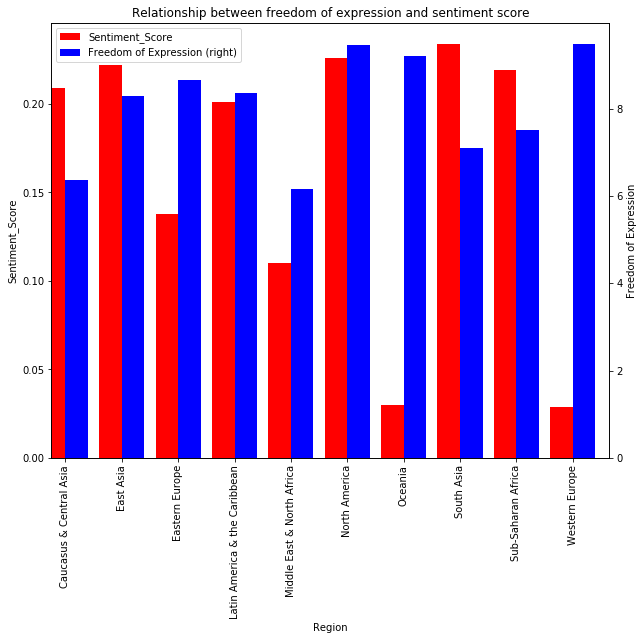

In [187]:
# Analyzing relationship between Freedom of Expression and Sentiment Score
df_clean["pf_expression"] = df_clean["pf_expression"].astype(float)
df_1 = df_clean.groupby(by="region", as_index=False).aggregate({"pf_expression":"mean"})
df_1

df_2 = new_df.groupby(by="region", as_index=False).aggregate({"score":"mean"})
df_2

frame = { 'Freedom of Expression': df_1["pf_expression"], 'Sentiment_Score': df_2["score"] , 'Region': df_1["region"]} 
  
result = pd.DataFrame(frame) 
result

plt.figure(figsize=(20,20))
ax = result.plot.bar(x = "Region",y="Sentiment_Score", color="r", position=1, width=0.4, figsize=(10,8))
ax2 = result.plot.bar(x = "Region",y="Freedom of Expression", secondary_y=True, ax=ax, rot=90, color="b", position=0, width=0.4)
plt.title("Relationship between freedom of expression and sentiment score")
ax.set_ylabel('Sentiment_Score')
ax2.set_ylabel('Freedom of Expression')
plt.savefig("expression_fig.png")

/Users/josh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Figure size 1440x1440 with 0 Axes>

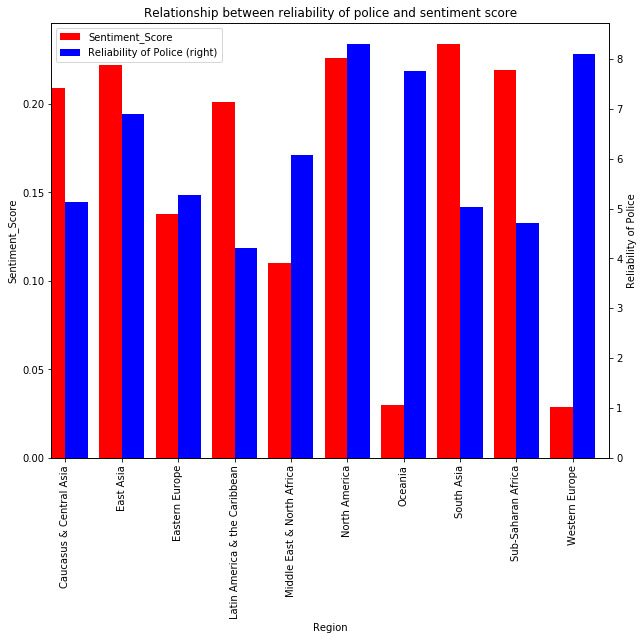

In [179]:
# Analyzing relationship between Reliability of Police and Sentiment Score
df_clean = df[~df.ef_legal_police.str.contains("-")]
df_clean["ef_legal_police"] = df_clean["ef_legal_police"].astype(float)
df_1 = df_clean.groupby(by="region", as_index=False).aggregate({"ef_legal_police":"mean"})
df_1

df_2 = new_df.groupby(by="region", as_index=False).aggregate({"score":"mean"})
df_2

frame = { 'Reliability of Police': df_1["ef_legal_police"], 'Sentiment_Score': df_2["score"] , 'Region': df_1["region"]} 
  
result = pd.DataFrame(frame) 
result

plt.figure(figsize=(20,20))
ax = result.plot.bar(x = "Region",y="Sentiment_Score", color="r", position=1, width=0.4, figsize=(10,8))
ax2 = result.plot.bar(x = "Region",y="Reliability of Police", secondary_y=True, ax=ax, rot=90, color="b", position=0, width=0.4)
plt.title("Relationship between reliability of police and sentiment score")
ax.set_ylabel('Sentiment_Score')
ax2.set_ylabel('Reliability of Police')
plt.show()

/Users/josh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Figure size 1440x1440 with 0 Axes>

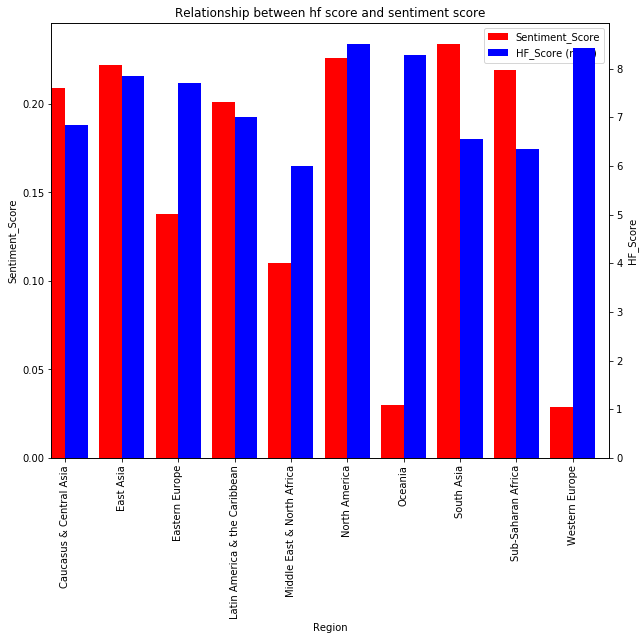

In [188]:
# Analyzing relationship between HF Score and Sentiment Score
df_clean["hf_score"] = df_clean["hf_score"].astype(float)
df_1 = df_clean.groupby(by="region", as_index=False).aggregate({"hf_score":"mean"})
df_1

df_2 = new_df.groupby(by="region", as_index=False).aggregate({"score":"mean"})
df_2

frame = { 'Sentiment_Score': df_2["score"], 'HF_Score': df_1["hf_score"] , 'Region':df_2["region"]} 
  
result = pd.DataFrame(frame) 

plt.figure(figsize=(20,20))
ax = result.plot.bar(x = "Region",y="Sentiment_Score", color="r", position=1, width=0.4, figsize=(10,8))
ax2 = result.plot.bar(x = "Region",y="HF_Score", secondary_y=True, ax=ax, rot=90, color="b", position=0, width=0.4)
plt.title("Relationship between hf score and sentiment score")
ax.set_ylabel('Sentiment_Score')
ax2.set_ylabel('HF_Score')
plt.savefig("hf_score.png")

In [158]:
# ANOVA Testing
model=ols("score ~ C(region)", data=new_df).fit()
table=sm.stats.anova_lm(model, typ=2)
print(table)
print("Region is a significant factor in determining sentiment score")

               sum_sq     df         F    PR(>F)
C(region)    5.820064    9.0  4.001829  0.000049
Residual   159.655417  988.0       NaN       NaN
Region is a significant factor in determining sentiment score


 Correlation between freedom of expression and sentiment magnitude: 0.013464033694300347


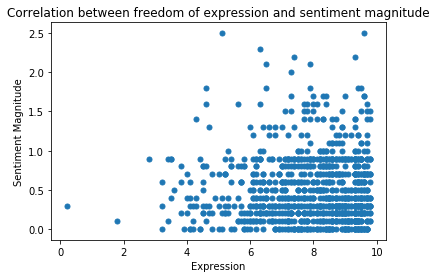

In [186]:
# Correlation between freedom of expression and sentiment magnitude
expression = df_clean["pf_expression"].sample(n=len(new_df["magnitude"]))
expression = np.array(expression).astype(float)
magnitude = np.array(new_df["magnitude"])
print(f" Correlation between freedom of expression and sentiment magnitude: {np.corrcoef(expression, magnitude)[0][1]}")

plt.figure(figsize=(6,4))
plt.scatter(expression, magnitude, marker=".", s=100)
plt.xlabel("Freedom of Expression")
plt.ylabel("Sentiment Magnitude")
plt.title("Correlation between freedom of expression and sentiment magnitude")
plt.show()